In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Data loading and processing
df = pd.read_csv("insurance.csv")

# Data Exploration
print("First 5 rows of the dataset:")
print(df.head())
print("\nSummary of the dataset:")
print(df.info())
print("\nDescriptive statistics of the dataset:")
print(df.describe())

First 5 rows of the dataset:
   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Descriptive statistics of the dataset:
               age         

In [3]:
# Data Cleaning
# Finding missing values
missing_values = df.isna().sum().sum()
print("\nTotal missing values in the dataset:", missing_values)
# Finding null values
print("\nNull values in the dataset:")
print(df.isnull().sum())



Total missing values in the dataset: 0

Null values in the dataset:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


In [10]:
# Encode categorical variables
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
print("\nEncoded dataset:")
print(df.head())


Encoded dataset:
   age  sex   bmi  children  smoker  region  expenses age_group bmi_category
0   19    0  27.9         0       1       3  16884.92     19-30   Overweight
1   18    1  33.8         1       0       2   1725.55      0-18        Obese
2   28    1  33.0         3       0       2   4449.46     19-30        Obese
3   33    1  22.7         0       0       1  21984.47     31-40       Normal
4   32    1  28.9         0       0       1   3866.86     31-40   Overweight


In [13]:
# Feature Engineering
# Create Age Groups
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 40, 50, 60, np.inf], labels=['0-18', '19-30', '31-40', '41-50', '51-60', '60+'])

# Create BMI Categories
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 35, np.inf], labels=['Underweight', 'Normal', 'Overweight', 'Obese', 'Extremely Obese'])

df['age_group'] = le.fit_transform(df['age_group'])
df['bmi_category'] = le.fit_transform(df['bmi_category'])

In [14]:
df

,age,sex,bmi,children,smoker,region,expenses,age_group,bmi_category
0,19,0,27.9,0,1,3,16884.92,1,3
1,18,1,33.8,1,0,2,1725.55,0,2
2,28,1,33.0,3,0,2,4449.46,1,2
3,33,1,22.7,0,0,1,21984.47,2,1
4,32,1,28.9,0,0,1,3866.86,2,3
...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55,3,2
1334,18,0,31.9,0,0,0,2205.98,0,2
1335,18,0,36.9,0,0,2,1629.83,0,0
1336,21,0,25.8,0,0,3,2007.95,1,3


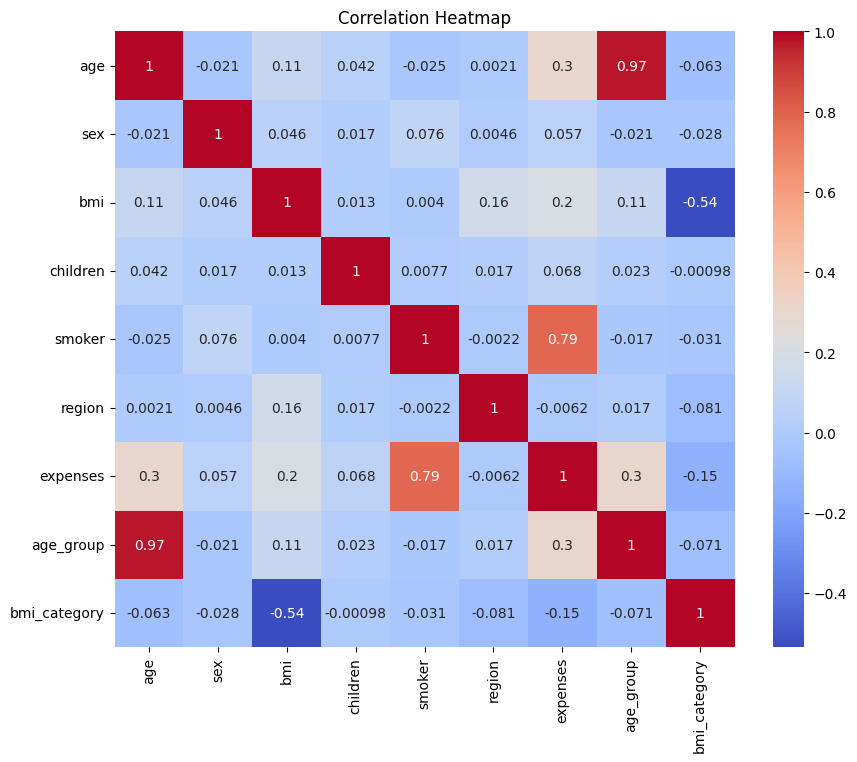

<Figure size 1000x800 with 0 Axes>

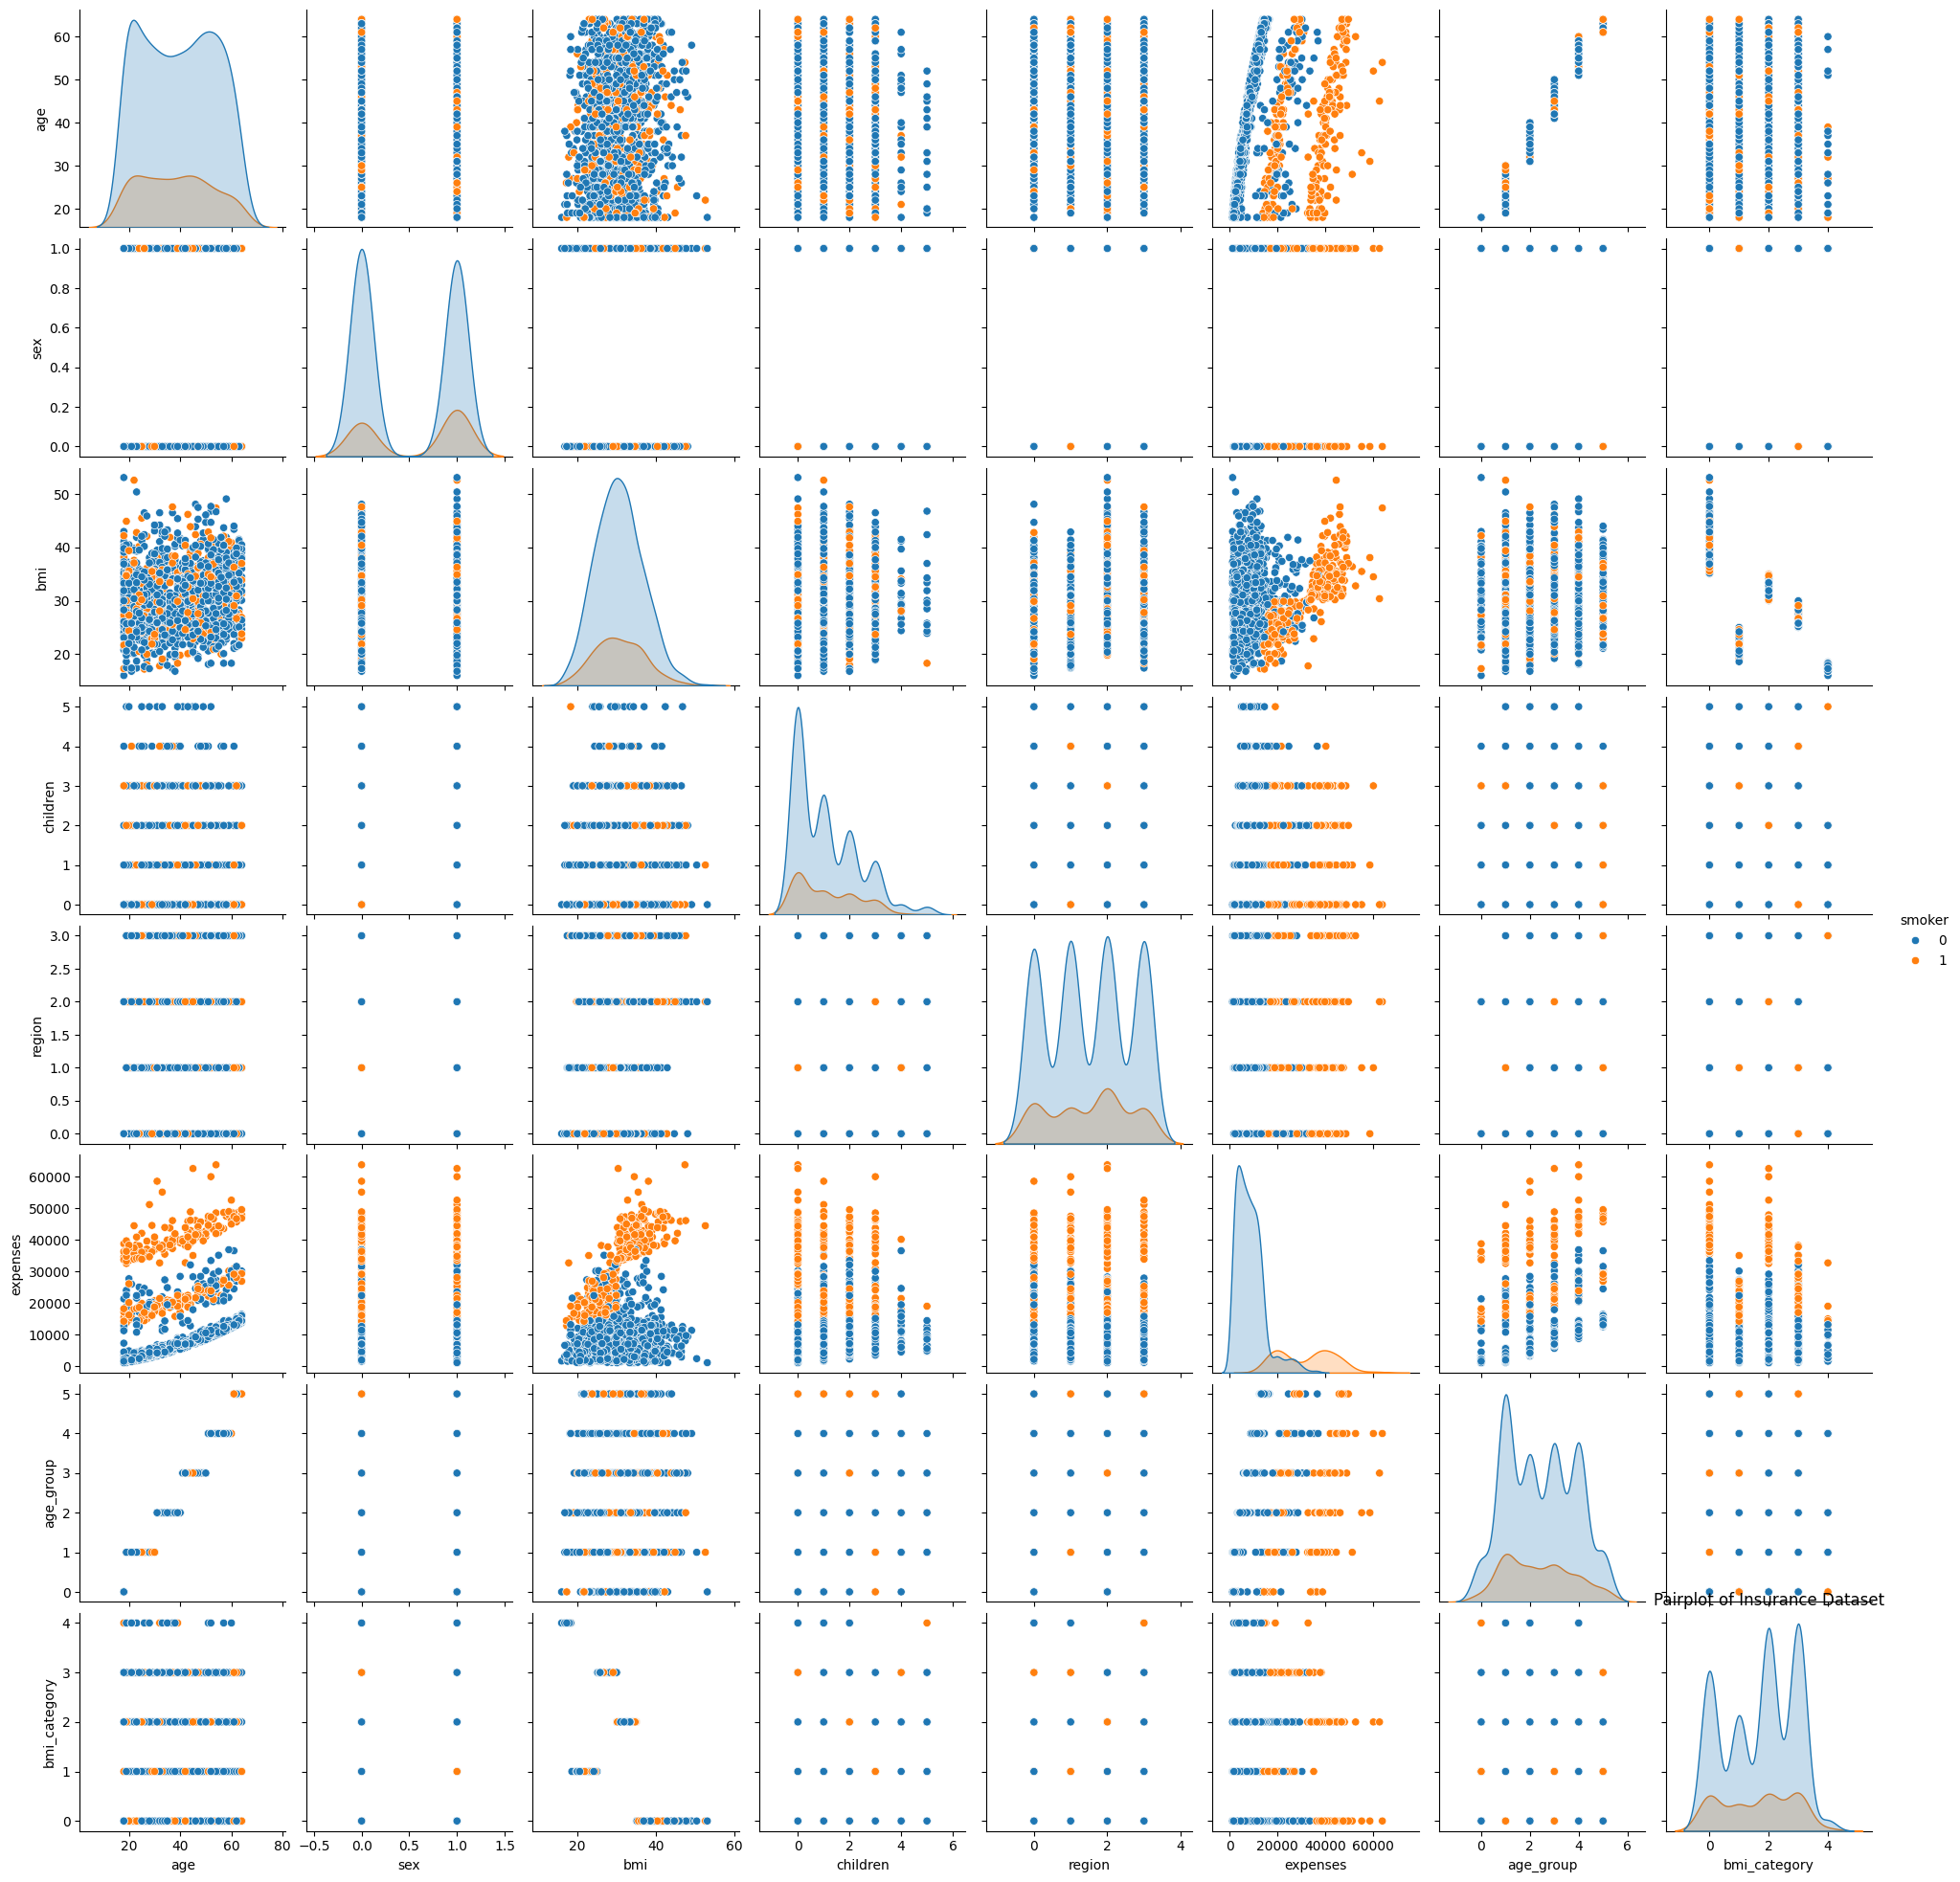

In [25]:
# Data Visualization
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(10, 8))
sns.pairplot(df, diag_kind='kde', hue='smoker')
plt.title('Pairplot of Insurance Dataset')
plt.show()


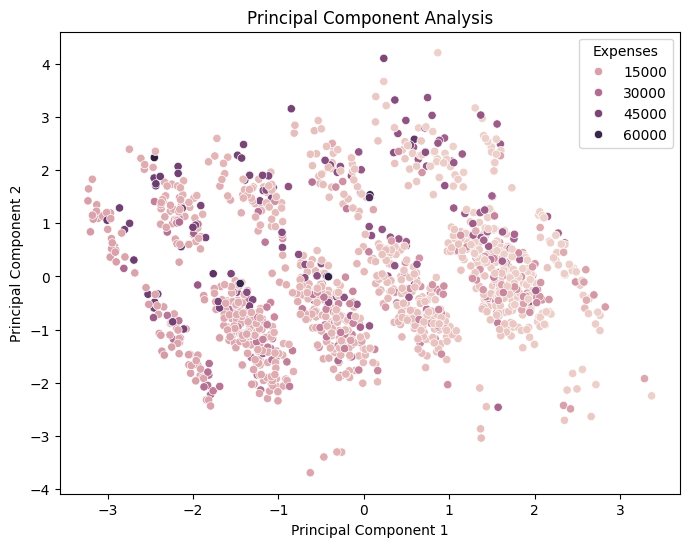

In [15]:
# Dimentionality Reduction Using PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop(['expenses'], axis=1)  # Features
y = df['expenses']  # Target variable

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Specify the number of components to keep
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the principal components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Concatenate the principal components with the target variable
df_pca['expenses'] = y

# Plot the principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='expenses')
plt.title('Principal Component Analysis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Expenses')
plt.show()


In [16]:
# Model Building
X = df.drop(columns=['expenses'])
y = df['expenses']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Model 1
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Model Testing
# Gradient Boosting Regressor
y_pred_gb = gb_model.predict(X_test)

# Evaluate the models
print("Model Evaluation:")
print("Gradient Boosting Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gb))
print("R-squared:", r2_score(y_test, y_pred_gb))

Model Evaluation:
Gradient Boosting Regressor:
Mean Squared Error: 19127731.85259212
R-squared: 0.8767929928096798


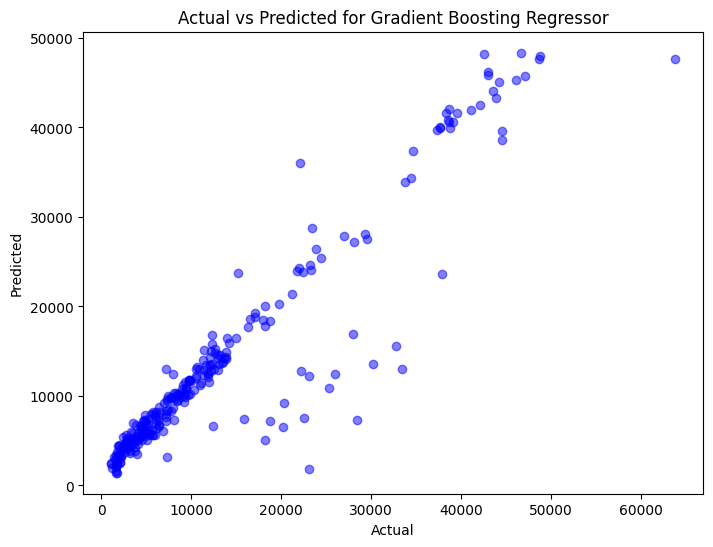

In [39]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color='blue', alpha=0.5)
plt.title('Actual vs Predicted for Gradient Boosting Regressor')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


Fitting 5 folds for each of 10 candidates, totalling 50 fits
RandomSearchCV
Best Parameters: {'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.01}
Mean Squared Error: 19708335.773366116
R-squared: 0.8730531624945744
------------------------------------------------------------------------------------
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters: {'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.01}
Mean Squared Error: 19343727.16147153
R-squared: 0.8754017073306033


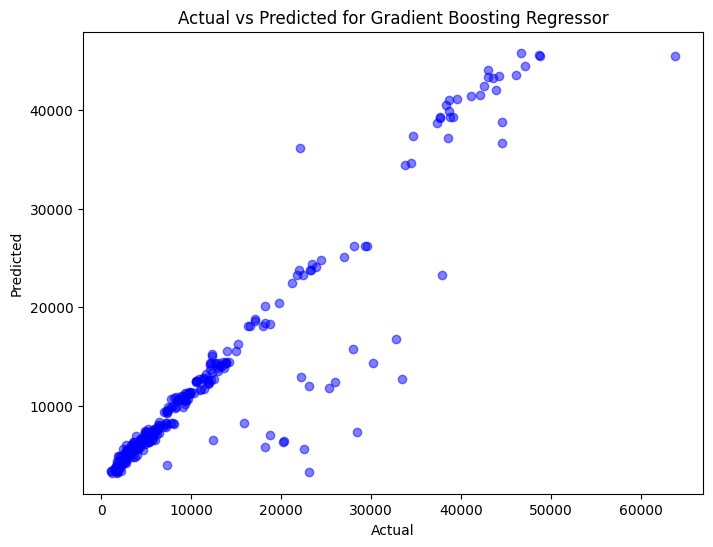

In [48]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Define Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_grid, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Make predictions using the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RandomSearchCV")
print("Best Parameters:", best_params)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("------------------------------------------------------------------------------------")


# Perform GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_g = grid_search.best_params_

# Make predictions using the best model
best_model_g = grid_search.best_estimator_
y_pred = best_model_g.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted for Gradient Boosting Regressor')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [22]:
# Model 1
# Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Model Testing
# Decision Tree Regressor
y_pred_dt = dt_model.predict(X_test)

# Evaluate the models
print("Model Evaluation:")
print("Decision Tree Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))
print("R-squared:", r2_score(y_test, y_pred_dt))

Model Evaluation:
Decision Tree Regressor:
Mean Squared Error: 44707427.82906008
R-squared: 0.7120271015693234


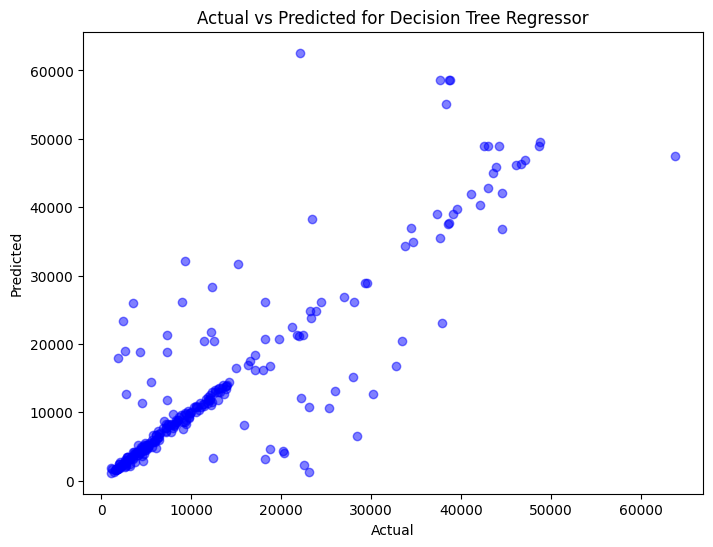

In [51]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='blue', alpha=0.5)
plt.title('Actual vs Predicted for Decision Tree Regressor')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [28]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initialize Decision Tree Regressor
dt_model = DecisionTreeRegressor()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt_model, param_distributions=param_grid, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params_random = random_search.best_params_

# Make predictions using the best model
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test)

# Evaluate the best model
mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)

print("RandomizedSearchCV - Best Parameters:", best_params_random)
print("RandomizedSearchCV - Mean Squared Error:", mse_random)
print("RandomizedSearchCV - R-squared:", r2_random)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_grid = grid_search.best_params_

# Make predictions using the best model
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_test)

# Evaluate the best model
mse_grid = mean_squared_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)

print("GridSearchCV - Best Parameters:", best_params_grid)
print("GridSearchCV - Mean Squared Error:", mse_grid)
print("GridSearchCV - R-squared:", r2_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
RandomizedSearchCV - Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5}
RandomizedSearchCV - Mean Squared Error: 23474022.328688428
RandomizedSearchCV - R-squared: 0.8487973346696348
Fitting 5 folds for each of 144 candidates, totalling 720 fits
GridSearchCV - Best Parameters: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV - Mean Squared Error: 22812670.31636753
GridSearchCV - R-squared: 0.8530572857587291


C:\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
103 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Python\Python311\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Python\Python311\Lib\site-packages\sklearn\utils\_param_v

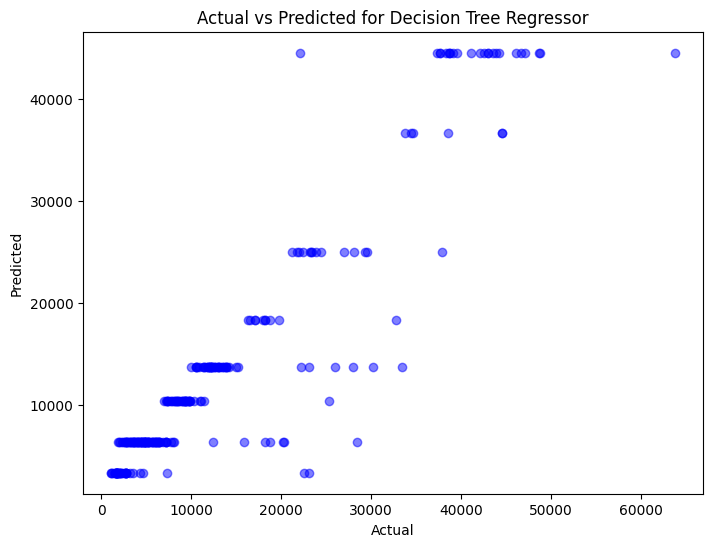

In [52]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_grid, color='blue', alpha=0.5)
plt.title('Actual vs Predicted for Decision Tree Regressor')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [23]:
# Model 1
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Model Testing
# Random Forest Regressor
y_pred_rf = rf_model.predict(X_test)

# Evaluate the models
print("Model Evaluation:")
print("Random Forest Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R-squared:", r2_score(y_test, y_pred_rf))

Model Evaluation:
Random Forest Regressor:
Mean Squared Error: 21232433.661857672
R-squared: 0.863236026780144


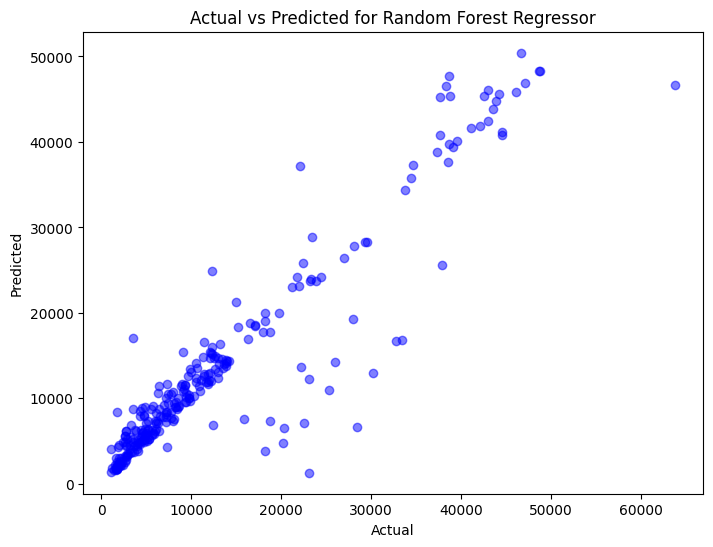

In [53]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.title('Actual vs Predicted for Random Forest Regressor')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [45]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Define Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Make predictions using the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RandomSearchCV")
print("Best Parameters:", best_params)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("------------------------------------------------------------------------------------")

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_g = grid_search.best_params_

# Make predictions using the best model
best_model_g = grid_search.best_estimator_
y_pred_g = best_model_g.predict(X_test)

# Evaluate the best model
mse_g = mean_squared_error(y_test, y_pred_g)
r2_g = r2_score(y_test, y_pred_g)

print("GridSearchCV")
print("Best Parameters:", best_params_g)
print("Mean Squared Error:", mse_g)
print("R-squared:", r2_g)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
RandomSearchCV
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': True}
Mean Squared Error: 18909175.033623908
R-squared: 0.8782007776831624
------------------------------------------------------------------------------------
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
GridSearchCV
Best Parameters: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error: 18971372.716579948
R-squared: 0.8778001452176802


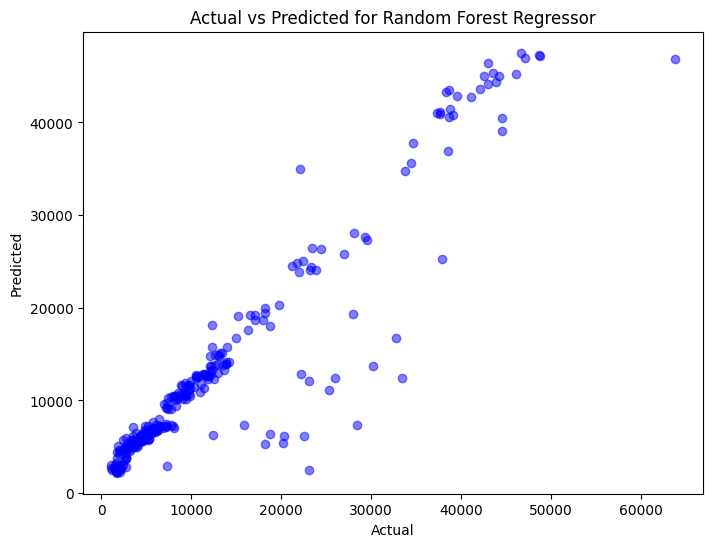

In [54]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_g, color='blue', alpha=0.5)
plt.title('Actual vs Predicted for Random Forest Regressor')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [24]:
# Model 1
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model Testing
# Linear Regression
y_pred_lr = lr_model.predict(X_test)

# Evaluate the models
print("Model Evaluation:")
print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R-squared:", r2_score(y_test, y_pred_lr))

Model Evaluation:
Linear Regression:
Mean Squared Error: 33631970.5744218
R-squared: 0.7833671826685563


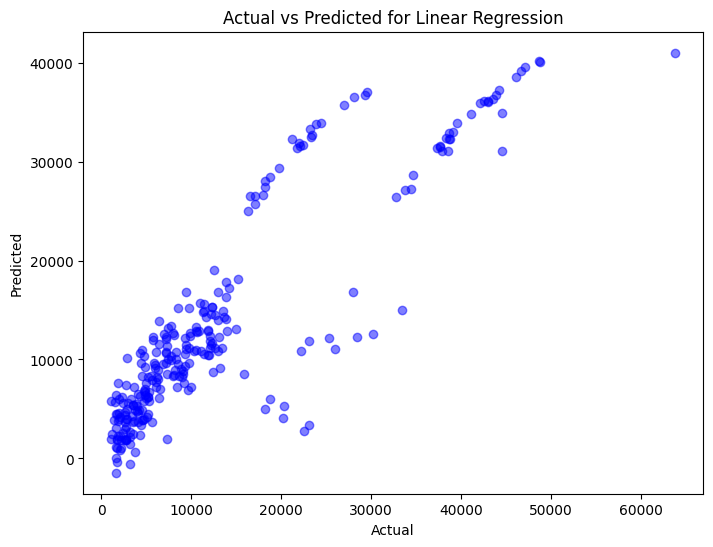

In [55]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.title('Actual vs Predicted for Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [30]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score

# Define the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(120, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Specify the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=1, validation_split=0.2, verbose=0)

# Evaluate the model on test data
y_pred = model.predict(X_test)

# Calculate metrics (mean squared error and R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print("Mean Squared Error on Test Set:", mse)
print("R-squared on Test Set:", r2)


C:\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Mean Squared Error on Test Set: 25410754.91885054
R-squared on Test Set: 0.8363223048019668


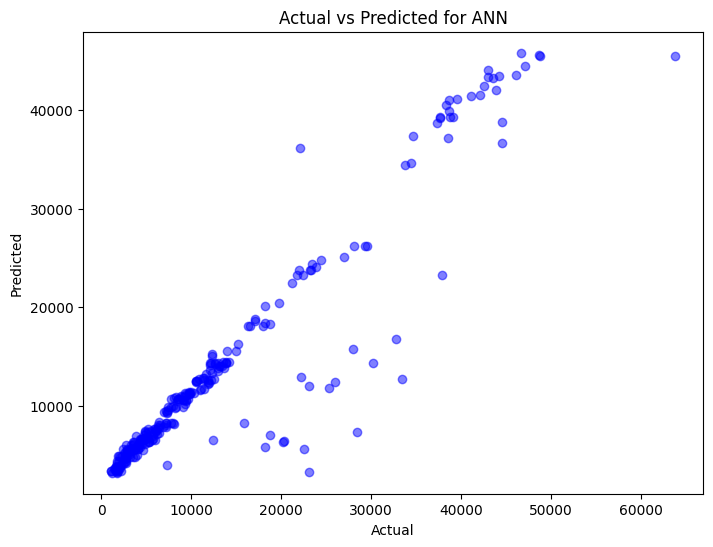

In [57]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted for ANN')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [33]:
from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define base models
base_models = [
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42)
]

# Define meta-model
meta_model = LinearRegression()

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Stacking Regressor
stacking_reg = StackingRegressor(regressors=base_models, meta_regressor=meta_model)

# Fit the stacking model
stacking_reg.fit(X_train, y_train)

# Evaluate the stacking model
y_pred_stacking = stacking_reg.predict(X_test)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

print("Stacking Regressor:")
print("Mean Squared Error:", mse_stacking)
print("R-squared:", r2_stacking)

Stacking Regressor:
Mean Squared Error: 42584021.07629183
R-squared: 0.7257045513094419


C:\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
C:\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


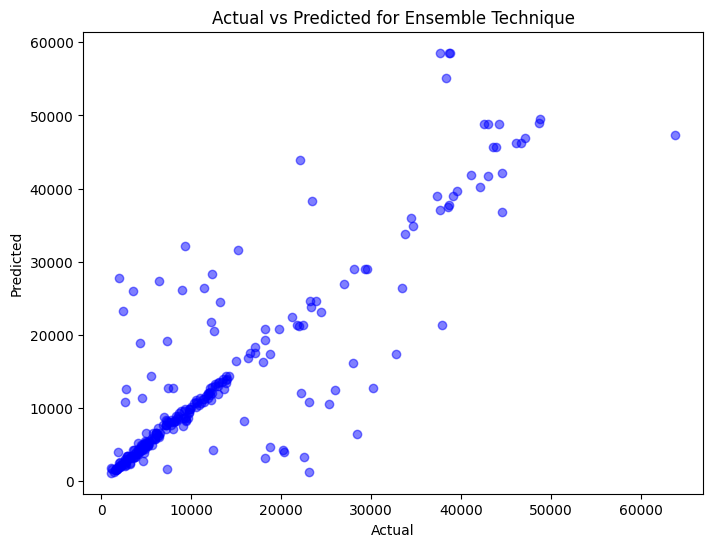

In [58]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_stacking, color='blue', alpha=0.5)
plt.title('Actual vs Predicted for Ensemble Technique')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [34]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
from scipy.stats import f_oneway

# Define models
models = {
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Linear Regression': LinearRegression()
}

# Setup data and cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

# Function to get MSE scores
def get_mse_scores(model, X, y, cv):
    mse = make_scorer(mean_squared_error, greater_is_better=False)
    scores = cross_val_score(model, X, y, cv=cv, scoring=mse)
    return -scores  # convert scores to positive

# Collect MSE scores
results = {name: get_mse_scores(model, X, y, kfold) for name, model in models.items()}

# Perform ANOVA
mse_scores = [score for score in results.values()]
f_stat, p_value = f_oneway(*mse_scores)

print("ANOVA results:")
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("There is a statistically significant difference between the models.")
else:
    print("There is no statistically significant difference between the models.")


ANOVA results:
F-Statistic: 54.39132875827116, P-Value: 1.885569886796811e-13
There is a statistically significant difference between the models.


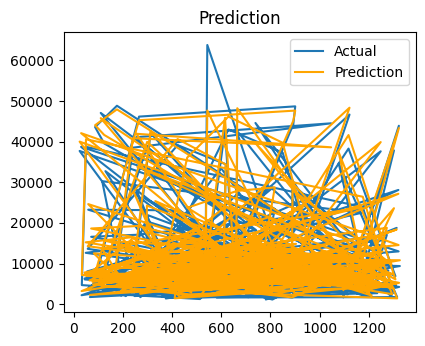

In [38]:
df1 = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred_gb})
plt.figure(figsize=(10, 8))

# Subplot for Actual values
plt.subplot(221)
plt.plot(df1['Actual'], label='Actual')
plt.title('Actual')
plt.legend()
# Subplot for Predicted values
plt.plot(df1['Prediction'], label='Prediction', color='orange')
plt.title('Prediction')
plt.legend()

plt.show()